# 2D Time evolution visualization for cos(wt) disturbance
## First import 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from Loader2D import *


## Set Parameters

In [83]:
filepath = "../../cmake-build-debug/bin/first.h5"
nt = 1000
nx = 1000
ny = 1000
xmax = 6.0
xmin = -6.0 
ymax = xmax
ymin = xmin
w1 = 2.0 * np.pi / 1000.0
a1 = 0.01 
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
x_mesh, y_mesh = np.meshgrid(x,y)
dt = 0.001

## Define Potential function and time-evolution Operator

In [75]:
class W_2D:
    """
    This class is an implementation of a 
    time only disturbance in order to further
    """
    def __init__(self,a1,a2,w1,w2):
        self.a1 = a1
        self.a2 = a2
        self.w1 = w1
        self.w2 = w2
    def __call__(self,t, x=0, y=0):
        return self.a1 * np.cos(self.w1 * t) + self.a2 * np.cos(self.w2 * t)
    

class VHarm_2D:
    """
    This class implements the harmonic potential 
    in two dimensions. 
    """
    def __init__(self):
        pass
    
    def __call__(self, x, y):
        return 0.5 * (x**2 + y**2)
    


## General analytic formula for the time evolution operator

In [76]:
%%latex
\begin{align}
\hat{U}(t_0,t_1) &= e ^ {- \frac{i}{\hbar}\int_{t_0}^{t_1}dt'\hat{H}(t')} \\
                 &= e ^{- \frac{i}{\hbar}(\Delta t \hat{H}_0 + \int_{t0}^{t1}dt' W_1(t'))}
\end{align}


<IPython.core.display.Latex object>

## Define class for particular time-evolution operator

In [77]:
class U_lin_dist:
    """
    Implementation of the time evolution
    operator using the above method
    """
    def __init__(self, E0, W, dt):
        self.E0 = E0
        self.W = W
        self.dt = dt
    
    def __call__(self, t):
        w_val = self.W(t)
        return np.exp(-1j * (self.E0 + np.trapz(w_val, dx=self.dt)))


## Define testfunction 


In [78]:
%%latex
$| \, \psi(t_0) \, \rangle$

<IPython.core.display.Latex object>

In [79]:
Psi0 = lambda x: np.pi**(-0.25) * np.exp(-x**2*0.5)
Psi2D = lambda x,y: Psi0(x) * Psi0(y) 

## Init psi, potentials and time evolution operator. Apply it afterwards

In [80]:
psi_an = np.complex128(Psi2D(x_mesh, y_mesh))
w = W_2D(a1, a1, w1, w1)
U = U_lin_dist(1.0, w, dt)
t = np.linspace(0, nt*dt,nt)
psi_an *= U(t)

## Load File and compare results in a 2D plot

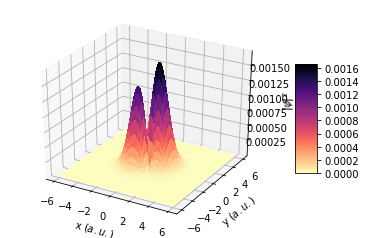

In [85]:
file = CLoader2D(nx, ny, filepath)

psi_num = file.get_complex_data("/real","/imag")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(r"x $(a.u.)$")
ax.set_ylabel(r"y $(a.u.)$")
ax.set_zlabel(r"$|\psi|^2$")
surf = ax.plot_surface(x_mesh,y_mesh,
                       np.abs(psi_an.real - psi_num.real),
                       cmap=cm.magma_r,
                       linewidth=1, 
                       antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()